#   Основы языка Python для аналитиков

## Урок 4. Визуальный анализ данных

### Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

#### 1.1. Скачать файл kc_house_data.csv - приложен на платформе

In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv')
df.head()   

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### 1.2 Изучите стоимости недвижимости

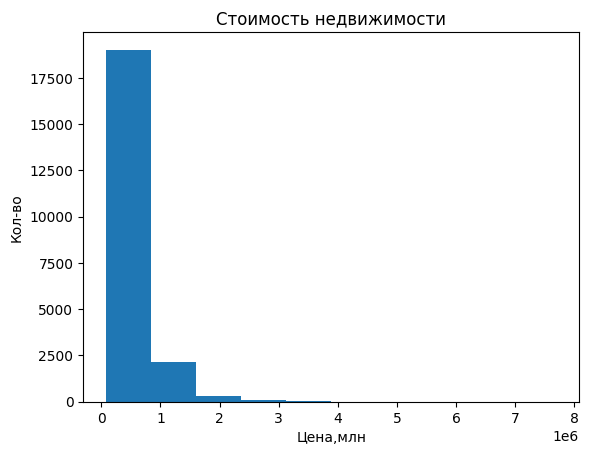

In [24]:
plt.hist(df['price'])
plt.xlabel('Цена,млн')
plt.ylabel('Кол-во')
plt.title('Стоимость недвижимости');


#### 1.3 Изучите распределение квадратуры жилой

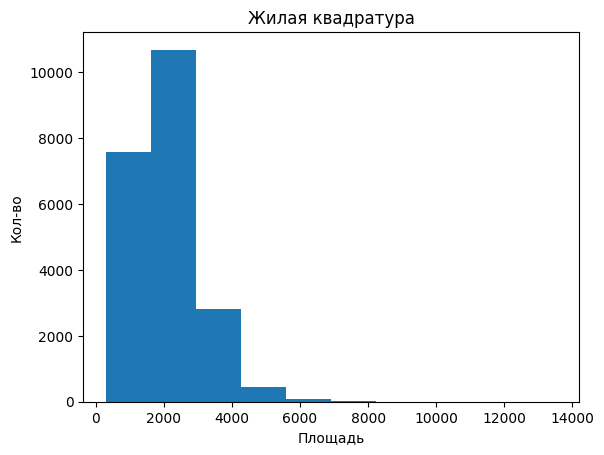

In [25]:
plt.hist(df['sqft_living'])
plt.xlabel('Площадь')
plt.ylabel('Кол-во')
plt.title('Жилая квадратура');


#### 1.4 Изучите распределение года постройки

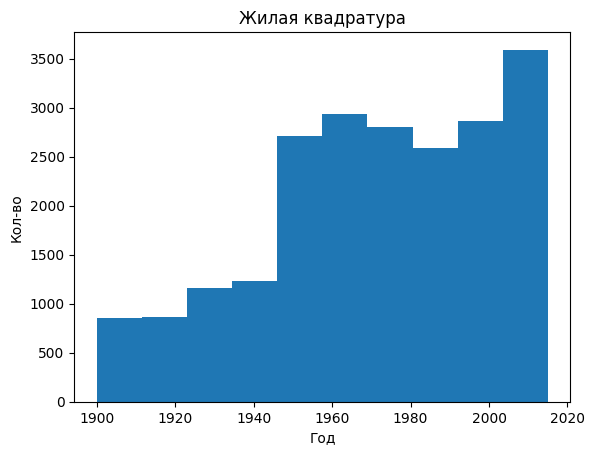

In [26]:
plt.hist(df['yr_built'])
plt.xlabel('Год')
plt.ylabel('Кол-во')
plt.title('Жилая квадратура');


### 2 задача
#### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

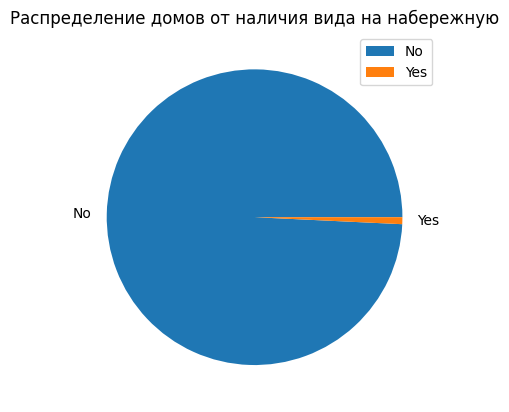

In [27]:
data_waterfront = df['waterfront'].value_counts().rename(index={0: 'No', 1: 'Yes'})
plt.pie(data_waterfront.values,labels=data_waterfront.index)
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data_waterfront.index);


#### 2.2 Изучите распределение этажей домов

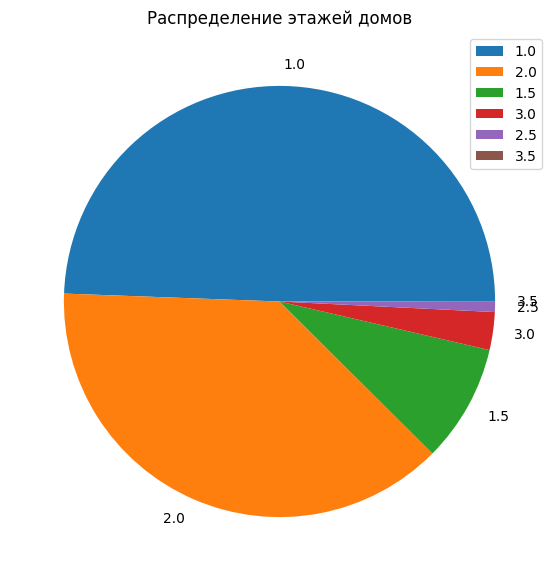

In [28]:
data_floor = df['floors'].value_counts()
data_floor
plt.figure(figsize=(7,7))
plt.pie(data_floor.values,labels=data_floor.index)
plt.title('Распределение этажей домов')
plt.legend(data_floor.index);


#### 2.2 Изучите распределение состояния домов

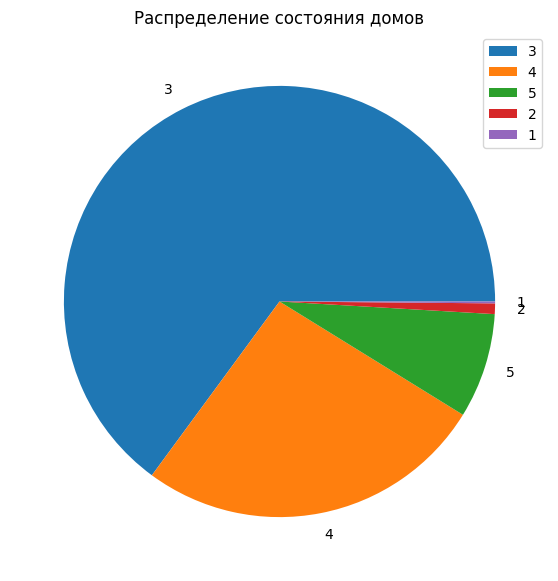

In [29]:
data_condition = df['condition'].value_counts()
data_condition
plt.figure(figsize=(7,7))
plt.pie(data_condition.values,labels=data_condition.index)
plt.title('Распределение состояния домов')
plt.legend(data_condition.index);


### 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [30]:
df.drop(columns='date',inplace=True)


<Axes: >

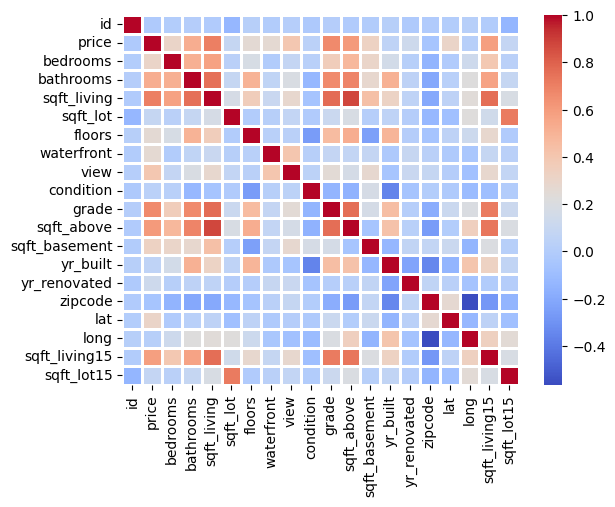

In [31]:
import seaborn as sns
data_corr = df.corr()
sns.heatmap(data_corr,cmap='coolwarm',linewidths=1)
#data_corr

Как мы видим из тепловой карты, наиболее коррелирующии признаки с Price являются такие как:
1) Sqft_living
2) Grade
3) Sqft_above
4) Bathrooms

Построим по каждому из этих параметров график взаимного распределения.

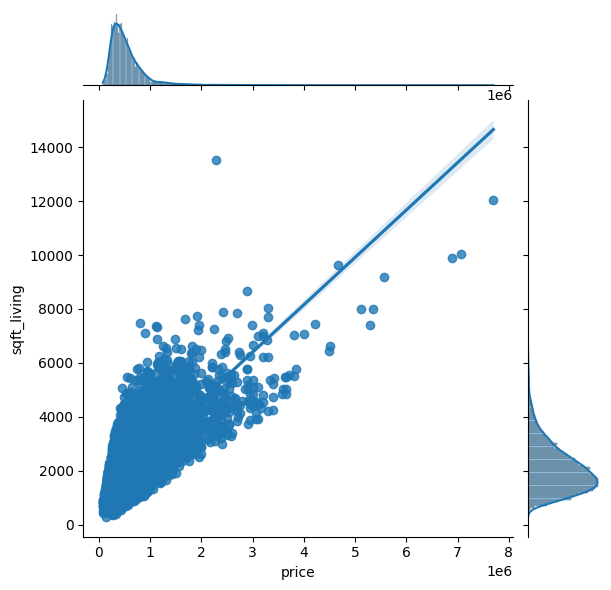

In [33]:
sns.jointplot(x=df['price'],y=df['sqft_living'],kind='reg');

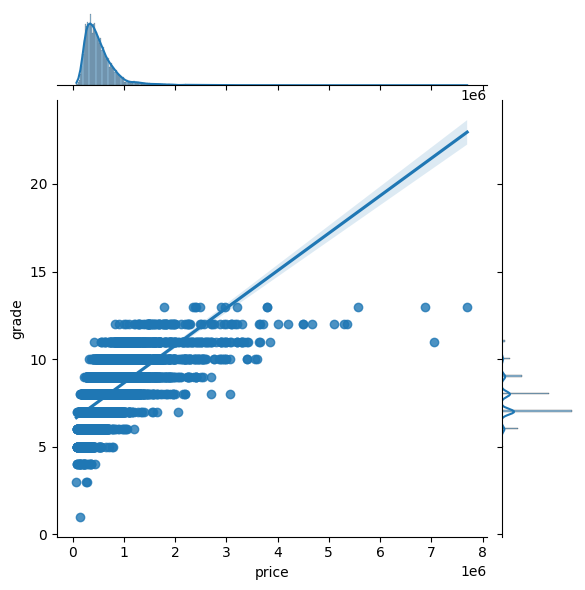

In [34]:
sns.jointplot(x=df['price'],y=df['grade'],kind='reg');


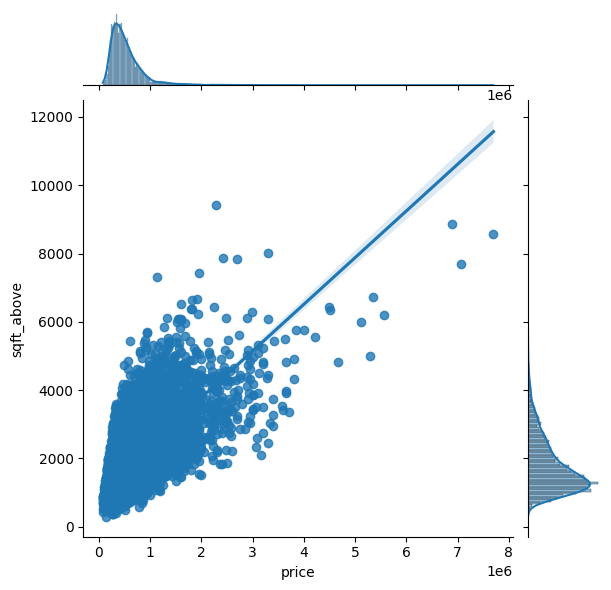

In [35]:
sns.jointplot(x=df['price'],y=df['sqft_above'],kind='reg');


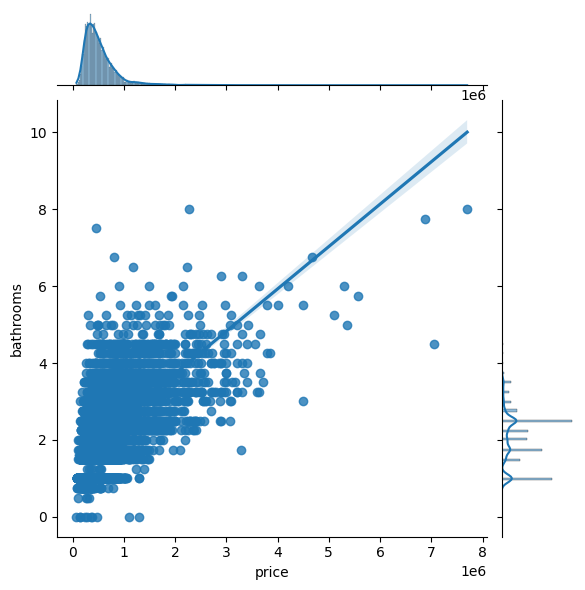

In [36]:
sns.jointplot(x=df['price'],y=df['bathrooms'],kind='reg');